# Data Set Representation

The data set contains info regarding the COVID 19 pandemic.
Summary Data Columns Description:
country: designates the Country in which the the row's data was observed.
continent: designates the Continent of the observed country.
total_confirmed: designates the total number of confirmed cases in the observed country.
total_deaths: designates the total number of confirmed deaths in the observed country.
total_recovered: designates the total number of confirmed recoveries in the observed country.
active_cases: designates the number of active cases in the observed country.
serious_or_critical: designates the estimated number of cases in serious or critical conditions in the observed country.
total_cases_per_1m_population: designates the number of total cases per 1 million population in the observed country.
total_deaths_per_1m_population: designates the number of total deaths per 1 million population in the observed country.
total_tests: designates the number of total tests done in the observed country.
total_tests_per_1m_population: designates the number of total test done per 1 million population in the observed country.
population: designates the population count in the observed country.
Daily Data Columns Description:
date: designates the date of observation of the row's data in YYYY-MM-DD format.
country: designates the Country in which the the row's data was observed.
cumulative_total_cases: designates the cumulative number of confirmed cases as of the row's date, for the row's country.
daily_new_cases: designates the daily new number of confirmed cases on the row's date, for the row's country.
active_cases: designates the number of active cases (i.e., confirmed cases that still didn't recover nor die) on the row's date, for the row's country.
cumulative_total_deaths: designates the cumulative number of confirmed deaths as of the row's date, for the row's country.
daily_new_deaths: designates the daily new number of confirmed deaths on the row's date, for the row's country.
These info were collected from woldometers.info on 2021-07-31 by Joseph Assaker.
Each row contains the info regarding the pandemic on a certain date while the column contains the info regarding the pandemic itself with 117284 observations overall.


# Data Cleaning


In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import norm
from scipy.stats import ttest_ind

covid_summary_df = pd.read_csv("worldometer_coronavirus_summary_data.csv")
covid_df = pd.read_csv("worldometer_coronavirus_daily_data.csv", parse_dates=['date'])

In [110]:
covid_summary_df.info()
covid_summary_df.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         220 non-null    object 
 1   continent                       220 non-null    object 
 2   total_confirmed                 220 non-null    int64  
 3   total_deaths                    207 non-null    float64
 4   total_recovered                 219 non-null    float64
 5   active_cases                    219 non-null    float64
 6   serious_or_critical             146 non-null    float64
 7   total_cases_per_1m_population   220 non-null    int64  
 8   total_deaths_per_1m_population  204 non-null    float64
 9   total_tests                     210 non-null    float64
 10  total_tests_per_1m_population   210 non-null    float64
 11  population                      220 non-null    int64  
dtypes: float64(7), int64(3), object(2)
m

country                           False
continent                         False
total_confirmed                   False
total_deaths                       True
total_recovered                    True
active_cases                       True
serious_or_critical                True
total_cases_per_1m_population     False
total_deaths_per_1m_population     True
total_tests                        True
total_tests_per_1m_population      True
population                        False
dtype: bool

The cases from the serious or critical column that have null entries can be attributed to there having been no serious or critical cases so the null values will be replace with 0 and since there are only few null observations relative to the amount of observations, those that contain null values will be removed

In [111]:
nan_variables = covid_summary_df.columns[covid_summary_df.isnull().any()].tolist()
exclude_variables = ['serious_or_critical']
dropped_variables = list(set(nan_variables) - set(exclude_variables))
print(dropped_variables)
covid_summary_df=covid_summary_df.dropna(subset=dropped_variables)

covid_summary_df.loc[covid_summary_df["serious_or_critical"].isnull(),"serious_or_critical"] = 0

['total_tests_per_1m_population', 'total_deaths', 'total_tests', 'total_recovered', 'active_cases', 'total_deaths_per_1m_population']


In [112]:
covid_summary_df.info()
covid_summary_df.isnull().any()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 219
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         199 non-null    object 
 1   continent                       199 non-null    object 
 2   total_confirmed                 199 non-null    int64  
 3   total_deaths                    199 non-null    float64
 4   total_recovered                 199 non-null    float64
 5   active_cases                    199 non-null    float64
 6   serious_or_critical             199 non-null    float64
 7   total_cases_per_1m_population   199 non-null    int64  
 8   total_deaths_per_1m_population  199 non-null    float64
 9   total_tests                     199 non-null    float64
 10  total_tests_per_1m_population   199 non-null    float64
 11  population                      199 non-null    int64  
dtypes: float64(7), int64(3), object(2)
m

country                           False
continent                         False
total_confirmed                   False
total_deaths                      False
total_recovered                   False
active_cases                      False
serious_or_critical               False
total_cases_per_1m_population     False
total_deaths_per_1m_population    False
total_tests                       False
total_tests_per_1m_population     False
population                        False
dtype: bool

In [113]:
covid_df.info()
covid_df.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117064 entries, 0 to 117063
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   date                     117064 non-null  datetime64[ns]
 1   country                  117064 non-null  object        
 2   cumulative_total_cases   117064 non-null  float64       
 3   daily_new_cases          110191 non-null  float64       
 4   active_cases             116532 non-null  float64       
 5   cumulative_total_deaths  110148 non-null  float64       
 6   daily_new_deaths         96221 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 6.3+ MB


date                       False
country                    False
cumulative_total_cases     False
daily_new_cases             True
active_cases                True
cumulative_total_deaths     True
daily_new_deaths            True
dtype: bool

Once again the non null objects are minimal except for the daily_new_deaths so the null entries will be removed but the null values in daily new deaths will be replace with 0 as no new deaths may have occured at that day. The same is true for daily_new_cases

In [114]:
nan_variables = covid_df.columns[covid_df.isnull().any()].tolist()
exclude_variables = ['daily_new_deaths ','daily_new_cases']
dropped_variables = list(set(nan_variables) - set(exclude_variables))
print(dropped_variables)
covid_df=covid_df.dropna(subset=dropped_variables)
covid_df.loc[covid_df["daily_new_deaths"].isnull(),'daily_new_deaths'] = 0
covid_df.loc[covid_df["daily_new_cases"].isnull(),'daily_new_cases'] = 0
covid_df.info()
covid_df.isnull().any()

['daily_new_deaths', 'active_cases', 'cumulative_total_deaths']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 95723 entries, 10 to 117063
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     95723 non-null  datetime64[ns]
 1   country                  95723 non-null  object        
 2   cumulative_total_cases   95723 non-null  float64       
 3   daily_new_cases          95723 non-null  float64       
 4   active_cases             95723 non-null  float64       
 5   cumulative_total_deaths  95723 non-null  float64       
 6   daily_new_deaths         95723 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 5.8+ MB


date                       False
country                    False
cumulative_total_cases     False
daily_new_cases            False
active_cases               False
cumulative_total_deaths    False
daily_new_deaths           False
dtype: bool

There are some invalid entries mainly negative number being inserted as an entries so those observations will be removed as there is no way to know the actual number intended for said entries.

In [115]:
covid_df.loc[covid_df['daily_new_cases'] <= -1]
covid_df.loc[covid_df['active_cases'] <= -1]
covid_df.loc[covid_df['daily_new_deaths'] <= -1]
covid_df = covid_df[covid_df['daily_new_cases'] >= 0 ]
covid_df = covid_df[covid_df['active_cases'] >= 0 ]
covid_df = covid_df[covid_df['daily_new_deaths'] >= 0 ]
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95258 entries, 10 to 117063
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     95258 non-null  datetime64[ns]
 1   country                  95258 non-null  object        
 2   cumulative_total_cases   95258 non-null  float64       
 3   daily_new_cases          95258 non-null  float64       
 4   active_cases             95258 non-null  float64       
 5   cumulative_total_deaths  95258 non-null  float64       
 6   daily_new_deaths         95258 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 5.8+ MB


# Exploratory Data Analysis

EDA Questions:<br>
what are the averages for the amount of active cases in the month of june and july?<br>
which country has the highest rate of recovery in COVID cases and what is the global average rate for COVID recoveries?<br>
which country have the highest average tests rate for covid 19 and what is the global average rate for testing?<br>

In [116]:


cond1 = covid_df.date <=  pd.Timestamp(2021, 7, 31)
cond2 = covid_df.date < pd.Timestamp(2021,6,30) 
cond3 = covid_df.date >= pd.Timestamp(2021,6,1)

july_cases = covid_df.loc[cond1]
cond4 = july_cases.date >= pd.Timestamp(2021,7,1)
july_cases = july_cases.loc[cond4]
june_cases = covid_df.loc[cond2]
cond3 = june_cases.date  >= pd.Timestamp(2021,6,1)
june_cases = june_cases.loc[cond3]

june_cases
covid_summary_df['recovery_percentage'] = covid_summary_df['total_recovered']/covid_summary_df['total_confirmed']
covid_summary_df['testing_percentage'] = covid_summary_df['total_tests']/covid_summary_df['population']


In [117]:

summary_stat = june_cases.agg({"active_cases": ["mean", "median", "std"]})
summary_stat

active_cases
mean     59106.343142
median    3661.000000
std     376405.887527

The table shows that the average amount of active COVID_19 cases around the world is 59106.34 in the month of june with a high standard deviation of 376405 which may show that large outliers may exists

In [118]:
summary_stat4 = july_cases.agg({"active_cases": ["mean", "median", "std", len]})
summary_stat4


active_cases
mean     62356.575602
median    4186.000000
std     361268.788339
len       6025.000000

The table shows that the average amount of active COVID_19 cases around the world is 62356.575602.34 in the month of june with a high standard deviation of 361268.788339 which may show that large outliers may exists

1. The average active cases in june is 59106.343142 <br>
   The average active cases in july is 62356.575602

In [119]:
summary_stat2 = covid_summary_df.groupby("country").agg({"recovery_percentage": ["mean"]})
recovery_percentage=covid_summary_df["recovery_percentage"].mean()
summary_stat2.sort_values(("recovery_percentage", "mean"), ascending=False)
print("The Global average for recovery percentages is " + str(recovery_percentage))



The Global average for recovery percentages is 0.8656636961472448


<AxesSubplot:xlabel='country'>

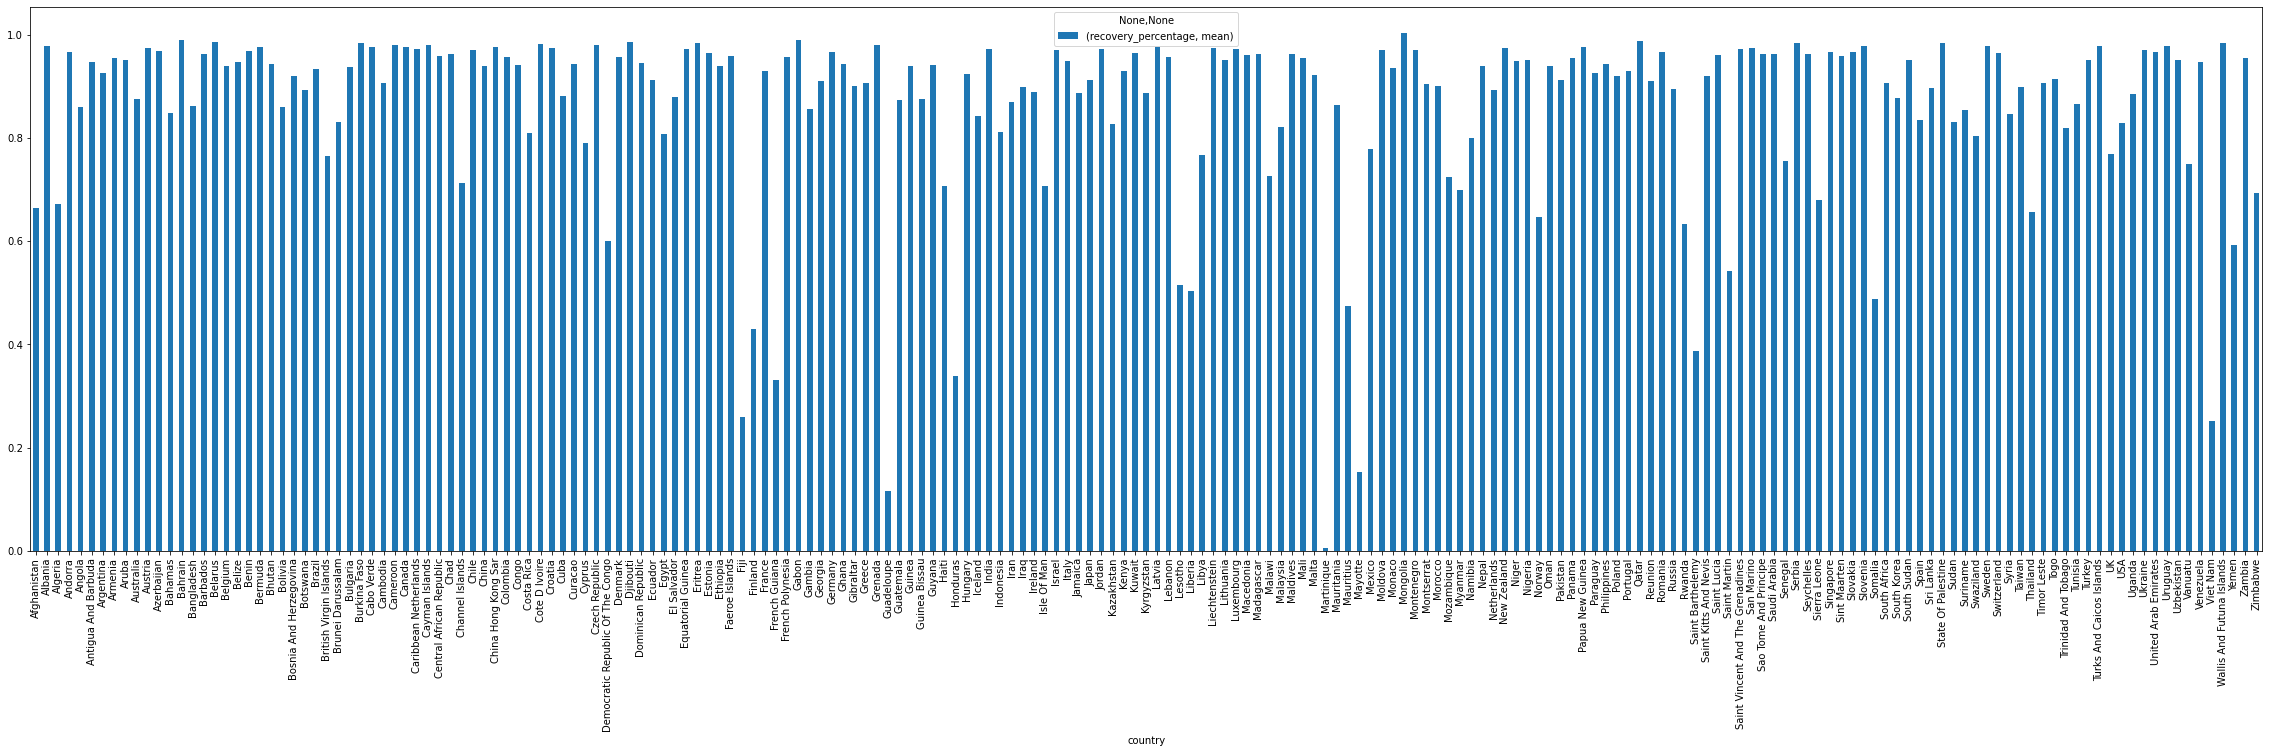

In [120]:
summary_stat2.plot.bar(figsize=(40,10))

As seen in the bar graph most countries have similar rates of recovery in COVID cases.

 2. the country with the highest recovery rate is mongolia 100% while The Global average for testing for COVID is 0.9178976926418948

In [121]:
summary_stat3 = covid_summary_df.groupby("country").agg({"testing_percentage": ["mean"]})
testing_percentages= covid_summary_df["testing_percentage"].mean()
summary_stat3.sort_values(("testing_percentage", "mean"), ascending=False)
print("The Global average for testing for COVID is " + str(testing_percentages))


The Global average for testing for COVID is 0.9178976926418948


<AxesSubplot:xlabel='country'>

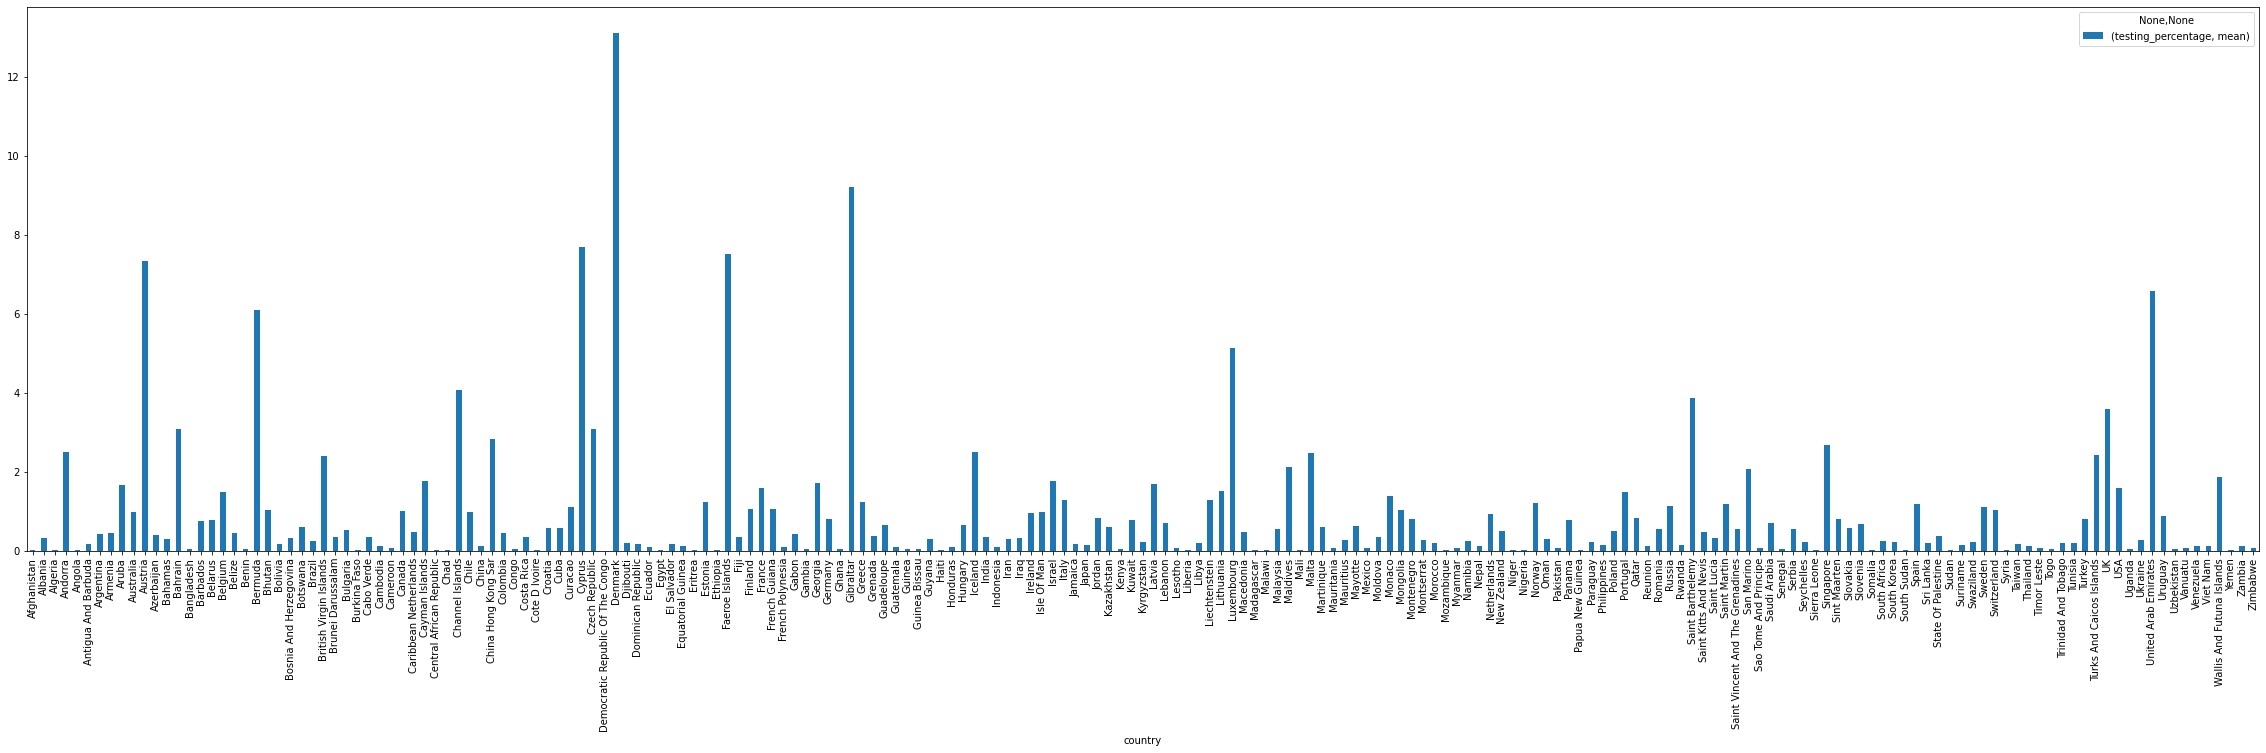

In [122]:
summary_stat3.plot.bar(figsize=(40,10))

As seen in the table and the bar graph Denmark has had the most tests done on their population well above the global average of

3. The Global average for testing for COVID is 0.9178976926418948 while Denkmark has had multiple tests on their population with multiple tests per person being very likely.

The graph shows Asia with the highest contact tracing and africa with the lowest. Asia's high mean of test may be because asia is the place of origin of Covid 19 and Africa's low testing mean may be explained by low covid related deaths or infections in africa.

# Research questions

1.Is there a significant difference in the average amount of active cases between the date of the first case of the month of june and the latest case in the month of july in the country of the Philippines

This is important to ascertain the current state of the pandemic in the philippines and if anything has changed in this month

2. Is there a significant difference between deaths and recoveries of people in countries that have had below the global average, above the global average, or at the global average?

The importance of this question is to give focus on whether or not mass testing should occur as if mass testing correlate to less deaths then it would be a viable goal to control the effect of COVID 19

# Stastical Inferences

1 Null Hypothesis: There is no significant differences between the total number of active cases between the date of the first case in june and the latest case in july


  Alternate Hypothesis There are significant differences between the total number of active cases between the date of the first case in june and the latest case in july

In [123]:
july_cases_sample = july_cases.sample(452, random_state=8)
agg = july_cases_sample.agg({"active_cases": ["mean", "median", "std"]})

sample_mean = agg.loc["mean"][0]
sample_median = agg.loc["median"][0]
sample_std = agg.loc["std"][0]

print('Sample Mean: {:.2f}'.format(sample_mean))
print('Sample Median: {:.2f}'.format(sample_median))
print('Sample Standard Deviation: {:.2f}'.format(sample_std))

june_cases_sample = june_cases.sample(452, random_state=8)
agg2 = june_cases_sample.agg({"active_cases": ["mean", "median", "std"]})

sample_mean2 = agg2.loc["mean"][0]
sample_median2 = agg2.loc["median"][0]
sample_std2 = agg2.loc["std"][0]

print('Sample Mean: {:.2f}'.format(sample_mean2))
print('Sample Median: {:.2f}'.format(sample_median2))
print('Sample Standard Deviation: {:.2f}'.format(sample_std2))
ttest_ind(july_cases["active_cases"],
          june_cases["active_cases"],
          equal_var = False)

Sample Mean: 68335.18
Sample Median: 3550.00
Sample Standard Deviation: 430827.18
Sample Mean: 50355.98
Sample Median: 3249.00
Sample Standard Deviation: 337365.92


Ttest_indResult(statistic=0.4789923901890992, pvalue=0.6319529452688271)

It can be concluded that the difference between the means for the two groups is not significantly different.

2. Null Hypothesis :  There is no significant difference between in the recovery percentage of cases of COVID-19 between countries that tested at the global mean for testing for Covid and in countries that didnt test at the global mean.

   Alternative Hypothesis :  There is a significant difference between in the recovery percentage of cases of COVID-19 between countries that tested at the global mean for testing for Covid and in countries that didnt test at the global mean.

In [124]:

summary_stat2

recovery_percentage
                                         mean
country                                      
Afghanistan                          0.665023
Albania                              0.978517
Algeria                              0.672587
Andorra                              0.968116
Angola                               0.860761
...                                       ...
Viet Nam                             0.251442
Wallis And Futuna Islands            0.984270
Yemen                                0.592692
Zambia                               0.956183
Zimbabwe                             0.693665

[199 rows x 1 columns]

In [125]:
summary_stat3

testing_percentage
                                        mean
country                                     
Afghanistan                         0.017739
Albania                             0.318945
Algeria                             0.005164
Andorra                             2.501292
Angola                              0.020065
...                                      ...
Viet Nam                            0.120980
Wallis And Futuna Islands           1.859967
Yemen                               0.005009
Zambia                              0.110352
Zimbabwe                            0.072125

[199 rows x 1 columns]

In [126]:
test_recovered_df = pd.merge(summary_stat2,summary_stat3, how='inner', on='country')
test_recovered_df

recovery_percentage testing_percentage
                                         mean               mean
country                                                         
Afghanistan                          0.665023           0.017739
Albania                              0.978517           0.318945
Algeria                              0.672587           0.005164
Andorra                              0.968116           2.501292
Angola                               0.860761           0.020065
...                                       ...                ...
Viet Nam                             0.251442           0.120980
Wallis And Futuna Islands            0.984270           1.859967
Yemen                                0.592692           0.005009
Zambia                               0.956183           0.110352
Zimbabwe                             0.693665           0.072125

[199 rows x 2 columns]

In [132]:
test_recovered_df.columns = ["recovered_percentage","test_percentage"]

test_recovered_df





recovered_percentage  test_percentage
country                                                         
Afghanistan                            0.665023         0.017739
Albania                                0.978517         0.318945
Algeria                                0.672587         0.005164
Andorra                                0.968116         2.501292
Angola                                 0.860761         0.020065
...                                         ...              ...
Viet Nam                               0.251442         0.120980
Wallis And Futuna Islands              0.984270         1.859967
Yemen                                  0.592692         0.005009
Zambia                                 0.956183         0.110352
Zimbabwe                               0.693665         0.072125

[199 rows x 2 columns]

In [133]:
list1 = list([])
tests_less = test_recovered_df.loc[test_recovered_df["test_percentage"] < testing_percentages]
tests = test_recovered_df.loc[test_recovered_df["test_percentage"] >= testing_percentages]
list1= list(tests_less.index.values) 
recovered_less = test_recovered_df.loc[test_recovered_df["recovered_percentage"] < recovery_percentage]
list2= list(recovered_less.index.values) 
list5 = list(test_recovered_df.index.values) 
list6 = list([])
list7 = list([])

In [134]:
test_recovered_df = pd.merge(summary_stat2,summary_stat3, how='inner', on='country')

In [135]:

stats_table_df = pd.DataFrame([])

stats_table_df["country"] = list5
stats_table_df.set_index('country',inplace = True)
stats_table_df = stats_table_df.sort_index()
stats_table_df["Less than or at least Global Mean tests"] =  "A"
stats_table_df["Less than or at least Global Mean recovered"] = "A"

stats_table_df

Less than or at least Global Mean tests  \
country                                                             
Afghanistan                                                     A   
Albania                                                         A   
Algeria                                                         A   
Andorra                                                         A   
Angola                                                          A   
...                                                           ...   
Viet Nam                                                        A   
Wallis And Futuna Islands                                       A   
Yemen                                                           A   
Zambia                                                          A   
Zimbabwe                                                        A   

                          Less than or at least Global Mean recovered  
country                                                                
Afghanistan                                                         A  
Albania                                                             A  
Algeria                                                             A  
Andorra                                                             A  
Angola                                                              A  
...                                                               ...  
Viet Nam                                                            A  
Wallis And Futuna Islands                                           A  
Yemen                                                               A  
Zambia                                                              A  
Zimbabwe                                                            A  

[199 rows x 2 columns]

In [136]:

list8 = list(stats_table_df.index.values)
for items in list8 :
    if items in list1:
        stats_table_df.at[items,"Less than or at least Global Mean tests"] = "Less than Global Mean tests"
    else:
        stats_table_df.at[items,"Less than or at least Global Mean tests"] = "At least Global Mean tests"
    if items in list2:
         stats_table_df.at[items,"Less than or at least Global Mean recovered"] = "Less than Global Mean recovered"
    else:
        stats_table_df.at[items,"Less than or at least Global Mean recovered"] = "At least Global Mean recovered"


In [137]:
stats_table_df

Less than or at least Global Mean tests  \
country                                                             
Afghanistan                           Less than Global Mean tests   
Albania                               Less than Global Mean tests   
Algeria                               Less than Global Mean tests   
Andorra                                At least Global Mean tests   
Angola                                Less than Global Mean tests   
...                                                           ...   
Viet Nam                              Less than Global Mean tests   
Wallis And Futuna Islands              At least Global Mean tests   
Yemen                                 Less than Global Mean tests   
Zambia                                Less than Global Mean tests   
Zimbabwe                              Less than Global Mean tests   

                          Less than or at least Global Mean recovered  
country                                                                
Afghanistan                           Less than Global Mean recovered  
Albania                                At least Global Mean recovered  
Algeria                               Less than Global Mean recovered  
Andorra                                At least Global Mean recovered  
Angola                                Less than Global Mean recovered  
...                                                               ...  
Viet Nam                              Less than Global Mean recovered  
Wallis And Futuna Islands              At least Global Mean recovered  
Yemen                                 Less than Global Mean recovered  
Zambia                                 At least Global Mean recovered  
Zimbabwe                              Less than Global Mean recovered  

[199 rows x 2 columns]

In [138]:
counts = stats_table_df.groupby("Less than or at least Global Mean tests")["Less than or at least Global Mean recovered"].value_counts()
counts


Less than or at least Global Mean tests  Less than or at least Global Mean recovered
At least Global Mean tests               At least Global Mean recovered                  42
                                         Less than Global Mean recovered                 13
Less than Global Mean tests              At least Global Mean recovered                 100
                                         Less than Global Mean recovered                 44
Name: Less than or at least Global Mean recovered, dtype: int64

In [139]:
table = pd.DataFrame([counts["At least Global Mean tests"], counts["Less than Global Mean tests"]], index=["At least Global Mean tests", "Less than Global Mean tests"]).transpose()
table


At least Global Mean tests  \
Less than or at least Global Mean recovered                               
At least Global Mean recovered                                       42   
Less than Global Mean recovered                                      13   

                                             Less than Global Mean tests  
Less than or at least Global Mean recovered                               
At least Global Mean recovered                                       100  
Less than Global Mean recovered                                       44

In [140]:
chi2_contingency(table)

(0.6244383816856482,
 0.4294027215112425,
 1,
 array([[ 39.24623116, 102.75376884],
        [ 15.75376884,  41.24623116]]))

p-value:   0.4294027215112425
With the p-value 0.4294027215112425 at 0.05 significance level,There is no significant difference between in the recovery percentage of cases of COVID-19 between countries that tested at the global mean for testing for Covid and in countries that didnt test at the global mean.

# Insights and conclusion

1. There were no significant difference between the amount of active cases between june and july so the measures that are currently being taken have had no effect on the amount of monthly active cases in the span of one month although, since the scope of the data was limited to the months of june and july, This conclusion may not be true for the long term. In conclusion, There was no significant difference in the short term effects of the global efforts to stop the spread of COVID

2 There is no significant difference between in the recovery percentage of cases of COVID-19 between countries that tested at the global mean for testing for Covid and in countries that didnt test at the global mean. This may imply that even when diagnosed early COVID 19 may still have the same lethality or that mass testing may have not caught those with covid infections early enough to make a difference with regards to survival rates. Lastly, A lack of effective treatments for COVID may contribute to the same recovery rates despite mass testing occuring as it can only help contact tracing but it can't help the person recover faster by knowing they have COVID earlier or by seeking treatments earlier as current treatments for covid may be ineffective even if COVID is tested early.